<font size="4">  
    ML 5622 Final Project - Laptop Prices
</font> 
<font size="3">  
    <ul>
        <li>Dataset is taken from <a href="https://www.kaggle.com/datasets/owm4096/laptop-prices" target="_blank">Kaggle</a></li>  
    </ul>
</font> 
<font size="2"> 
    For complete analysis and write up please consult the <b>README</b>
</font>

In [49]:
# import libraries used from previous assignments
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [50]:
# connect to Kaggle dataset and display contents
df = pd.read_csv('laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [51]:
## Data Cleaning
# remove Apple products
i = df[(df.Company == 'Apple')].index
df = df.drop(i)
# remove unnecessary features / features I don't care about
df = df.drop(columns=['TypeName','Touchscreen','IPSpanel','RetinaDisplay'])
# count how many rows actually have secondary storage
secondary_storage_value_counts = df['SecondaryStorage'].value_counts()
print('secondary_storage_value_counts: ', secondary_storage_value_counts)
# remove secondary storage - too few laptops actually have secondary storage
df = df.drop(columns=['SecondaryStorage','SecondaryStorageType'])

# inspect cleaned data for oddities
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(df)


secondary_storage_value_counts:  SecondaryStorage
0       1046
1024     187
2048      15
256        3
500        2
512        1
Name: count, dtype: int64


<Axes: >

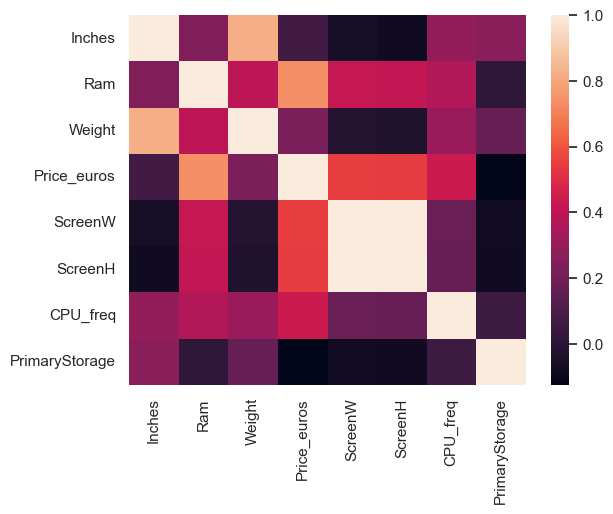

In [52]:
## EDA
# visualizing coorelation matrix
# remove non numeric columns for heatmap
dfNumericFeatures = df[['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage']]
sns.heatmap(dfNumericFeatures.corr())

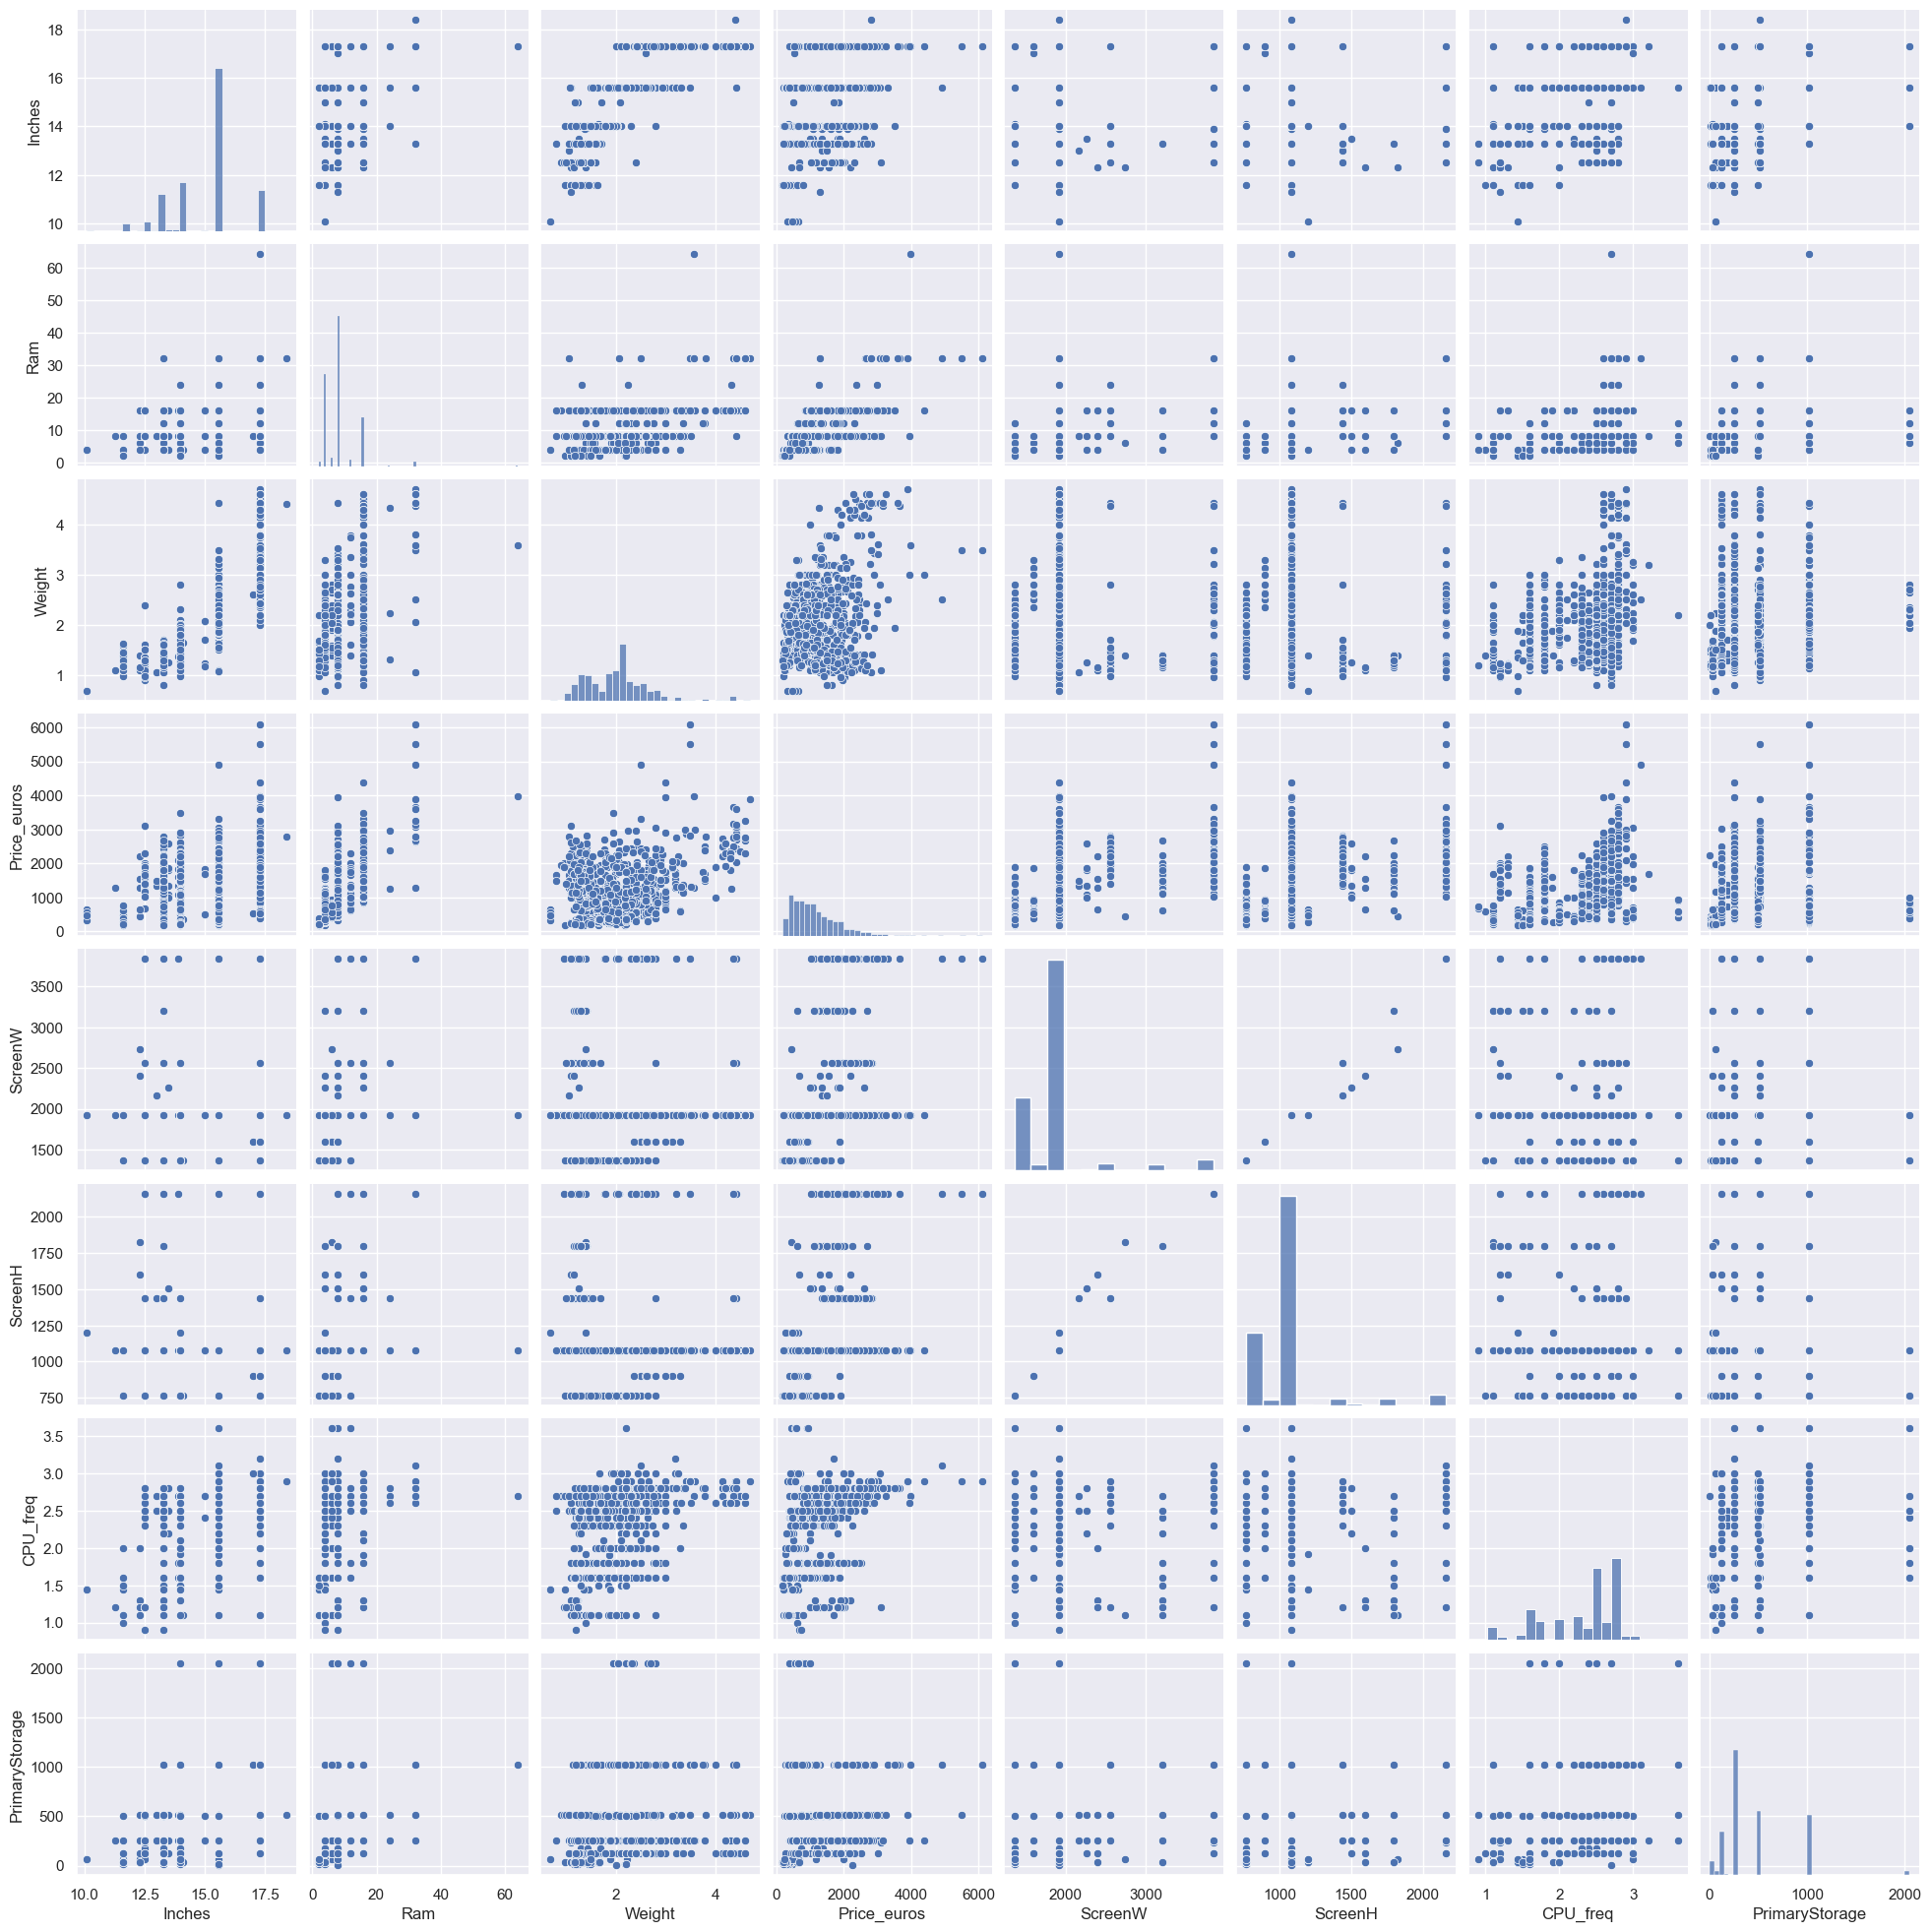

In [53]:
# inspecting relationships between features
dfNumericFeatures = dfNumericFeatures.apply(lambda x: pd.to_numeric(x, errors='coerce'))
sns.pairplot(dfNumericFeatures)
plt.show()